In [1]:
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim
import pandas as pd 

data = pd.read_csv("dataset/tweets_clean10.csv")

list_of_list_of_tokens = []
for item in data["Review"]:
    temp = []
    for word in item.split(' '):
        if not (word.startswith('@')):
            temp.append(word)
    list_of_list_of_tokens.append(temp)


dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

num_topics = 3
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=4, alpha=[0.01]*num_topics, eta=[0.01]*len(dictionary_LDA.keys()))

for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=50):
    print(str(i)+": "+ topic)
    print()



# lda_model[corpus[0]] # corpus[0] means the first document.


# vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
# pyLDAvis.enable_notebook()
# pyLDAvis.display(vis)

#creates webserver
# pyLDAvis.show(vis)



def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data['Review'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show

df_dominant_topic.to_csv('lda_document_output.csv')


0: 0.024*"woman" + 0.012*"right" + 0.011*"get" + 0.010*"people" + 0.009*"anti" + 0.008*"want" + 0.008*"like" + 0.008*"law" + 0.008*"pro" + 0.008*"amp" + 0.007*"one" + 0.007*"make" + 0.006*"life" + 0.006*"death" + 0.006*"u" + 0.006*"men" + 0.006*"would" + 0.005*"support" + 0.005*"think" + 0.005*"need" + 0.005*"say" + 0.005*"know" + 0.005*"choice" + 0.004*"state" + 0.004*"go" + 0.004*"see" + 0.004*"penalty" + 0.004*"control" + 0.004*"year" + 0.004*"time" + 0.004*"ban" + 0.004*"even" + 0.004*"issue" + 0.004*"also" + 0.003*"going" + 0.003*"access" + 0.003*"body" + 0.003*"sex" + 0.003*"country" + 0.003*"movie" + 0.003*"legal" + 0.003*"way" + 0.003*"birth" + 0.003*"really" + 0.003*"thing" + 0.003*"care" + 0.003*"stop" + 0.003*"illegal" + 0.003*"clinic" + 0.003*"many"

1: 0.040*"bill" + 0.034*"ohio" + 0.022*"heartbeat" + 0.022*"texas" + 0.020*"ban" + 0.016*"state" + 0.015*"law" + 0.013*"governor" + 0.011*"sign" + 0.009*"week" + 0.009*"death" + 0.008*"roe" + 0.008*"penalty" + 0.007*"v" + 0.007

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9597,"baby, woman, life, murder, child, get, right, ...",year old orphan lady raped kept secret knowing...
1,1,2.0,0.8557,"baby, woman, life, murder, child, get, right, ...",use abortion form fucking prick deserve ever baby
2,2,2.0,0.9983,"baby, woman, life, murder, child, get, right, ...",keep telling u abortion safe abortion clinic k...
3,3,2.0,0.7789,"baby, woman, life, murder, child, get, right, ...",prisonplanet hopefully get several someone kil...
4,4,2.0,0.5269,"baby, woman, life, murder, child, get, right, ...",coffeecup6891 thatgiirl30 becomes fetus 20wks ...
5,5,2.0,0.4597,"baby, woman, life, murder, child, get, right, ...",study show pro life law effective saving baby ...
6,6,0.0,0.8420,"woman, right, get, people, anti, want, like, l...",right city abortion decriminalisation marijuan...
7,7,0.0,0.9983,"woman, right, get, people, anti, want, like, l...",give birth make sign paper requires either get...
8,8,2.0,0.9990,"baby, woman, life, murder, child, get, right, ...",pastorlocke twitter lol pretty sure plenty exc...
9,9,1.0,0.5443,"bill, ohio, heartbeat, texas, ban, state, law,...",banning abortion early week pregnancy suddenly...


In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
df_dominant_topic = pd.read_csv('lda_document_output.csv')

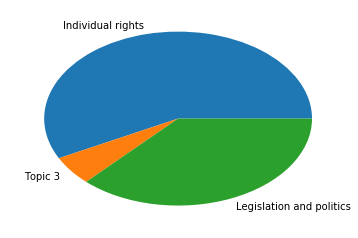

Dominant_Topic
0.0    49877
1.0     4710
2.0    32107
Name: Document_No, dtype: int64

In [8]:
plt.pie(df_dominant_topic.groupby('Dominant_Topic').count()["Document_No"], labels=['Individual rights','Topic 3','Legislation and politics'])
plt.show()

df_dominant_topic.groupby('Dominant_Topic').count()["Document_No"]